In [1]:
import pandas as pd
df = pd.read_csv('c:/data/convenience/temp/df_dis2,3.csv', encoding='ANSI', index_col=0)
df

,비아파트가구수,아파트평균시가,약국수,극장수,의료기관,교육기관,대중교통,월매출평균,survive
상권코드,,,,,,,,,
1000001,773.850000,2.190338e+08,0.0,12.700000,0.0,0.0,7.6,6.377865e+07,62.962963
1000002,788.750000,8.706928e+07,0.0,1.000000,0.0,0.0,1.0,4.564560e+07,100.000000
1000003,661.100000,1.139950e+08,0.0,1.800000,0.0,3.2,4.3,2.371337e+07,61.538462
1000004,782.750000,8.857558e+07,3.0,0.000000,0.0,0.0,8.0,9.412677e+07,42.583732
1000005,725.714286,1.927482e+08,0.0,0.714286,0.0,0.0,3.0,6.265570e+07,68.181818
...,...,...,...,...,...,...,...,...,...
1001489,129.150000,1.805066e+08,4.6,0.000000,0.0,0.0,3.5,2.988283e+07,56.834532
1001491,3661.750000,3.527378e+08,3.0,10.800000,0.0,0.0,22.1,1.331331e+07,82.608696
1001493,1071.350000,2.198021e+08,12.4,13.200000,2.2,4.4,22.0,5.334804e+06,69.696970


In [2]:
X=df.iloc[:,:-1] #독립변수
y=df['survive'] #종속변수

In [3]:
from sklearn.model_selection import train_test_split 
#학습용:검증용 8:2로 구분
X_train, X_test, y_train, y_test=train_test_split(X, y)
print(len(X_train),len(X_test),len(y_train),len(y_test))

864 289 864 289


In [4]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled=pd.DataFrame(X_test_scaled)

In [5]:
result_tr=[] #모델별 학습용 정확도 저장 리스트
result_te=[] #모델별 학습용 정확도 저장 리스트
result_rm=[] #모델별 평균제곱오차 저장 리스트

In [6]:
################ Linear Regression ################
from sklearn.linear_model import LinearRegression 
lin=LinearRegression()
lin.fit(X_train_scaled, y_train) #표준화된 데이터로 학습
score_tr=lin.score(X_train_scaled, y_train)
score_te=lin.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 정확도 : 0.09418571941097065
검증용 정확도 : 0.02384729516925388


In [7]:
from sklearn.metrics import mean_squared_error
import numpy as np
predictions = lin.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 20.07315557147042


In [8]:
################ Decision Tree ################
from sklearn.tree import DecisionTreeRegressor 
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
print('학습용 정확도 :', tree.score(X_train_scaled, y_train))
print('검증용 정확도 :', tree.score(X_test_scaled, y_test))

학습용 정확도 : 1.0
검증용 정확도 : -1.0760403848715185


In [9]:
# max_depth 3으로 가지치기
tree=DecisionTreeRegressor(max_depth=3)
tree.fit(X_train_scaled, y_train)
score_tr=tree.score(X_train_scaled, y_train)
score_te=tree.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 정확도 : 0.1582823710332053
검증용 정확도 : -0.10031608222205324


In [10]:
predictions = tree.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 21.311572695211012


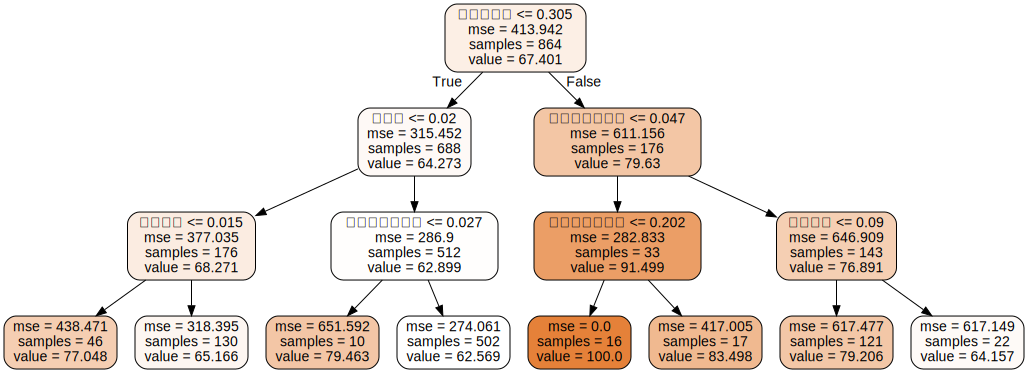

In [11]:
from sklearn.tree import export_graphviz 
export_graphviz(
    tree, 
    out_file='c:/data/project/dicisionTree.dot',
    feature_names = X_train_scaled.columns,
    class_names=['0','1'],
    rounded=True,
    filled=True
)

import graphviz
with open('c:/data/project/dicisionTree.dot', encoding="utf-8") as f:
    dot_graph = f.read() 
dot = graphviz.Source(dot_graph)
dot.format = 'png'
dot.render(filename='dicisionTree', directory='c:/data/project')
dot

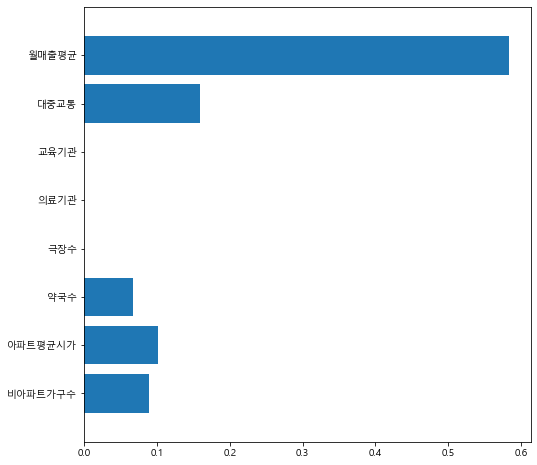

In [12]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

#특성 중요도 그래프
def plot_tree(model):
    n_features=X.shape[1] #독립변수의 개수
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.ylim(-1, n_features)

plot_tree(tree) 

In [13]:
################ RandomForest ################
from sklearn.ensemble import RandomForestRegressor
# n_estimators 트리의 개수 
forest=RandomForestRegressor(n_estimators=50)
forest.fit(X_train_scaled, y_train)
score_tr=forest.score(X_train_scaled, y_train)
score_te=forest.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 정확도 : 0.8619482224211334
검증용 정확도 : -0.07044723313407553


In [14]:
predictions = forest.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 21.020323789615283


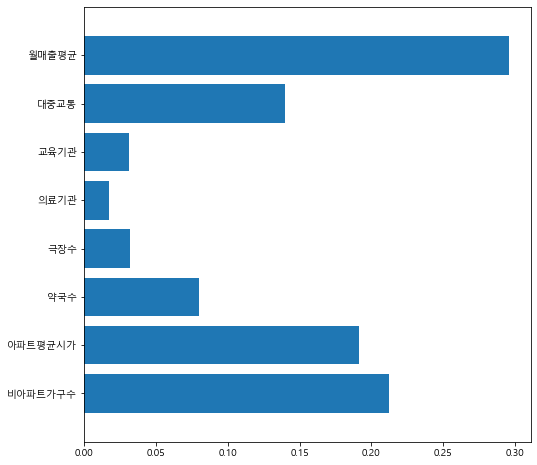

In [15]:
plot_tree(forest) #특성 중요도 그래프
# research > teaching > citations

이웃 수 1 일때 :  -0.6916398523016434
이웃 수 2 일때 :  -0.3769633026525987
이웃 수 3 일때 :  -0.2718833254217372
이웃 수 4 일때 :  -0.1713150341038181
이웃 수 5 일때 :  -0.12303877477524328
이웃 수 6 일때 :  -0.07479963175356286
이웃 수 7 일때 :  -0.06356938790513533
이웃 수 8 일때 :  -0.04407645393417092
이웃 수 9 일때 :  -0.026114743078548885
이웃 수 10 일때 :  -0.004976146389198632
이웃 수 11 일때 :  0.006851864937014507
이웃 수 12 일때 :  0.009096238010767865
이웃 수 13 일때 :  0.013467280549900984
이웃 수 14 일때 :  0.03053388866628648
최적의 k: 14
최적의 정확도: 0.03053388866628648


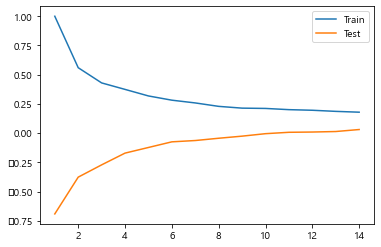

In [16]:
################ K-Means ################
from sklearn.neighbors import KNeighborsRegressor
import numpy as np 
train_rate=[]
test_rate=[]
neighbors=range(1,15) # 이웃의 수 1~10
for n in neighbors:
    knr=KNeighborsRegressor(n_neighbors=n) #이웃의 수
    knr.fit(X_train_scaled, y_train)
    train_rate.append(knr.score(X_train_scaled, y_train))
    test_rate.append(knr.score(X_test_scaled, y_test))

for i in range(0, len(test_rate)) :
    print('이웃 수', i+1, '일때 : ', test_rate[i])
test_arr=np.array(test_rate) #넘파이배열로 바꾸고
idx=np.argmax(test_arr)
# print(test_arr[idx]) #최대값의 인덱스
# max_rate=np.max(test_arr) #최대값
# print(test_arr[max_rate])
# np.where() #조건에 맞는 데이터의 인덱스 검색 
# idx=np.where(test_arr == max_rate)[0][0] 
print('최적의 k:',neighbors[idx])
print('최적의 정확도:',test_rate[idx]) 
plt.plot(neighbors, train_rate, label='Train')
plt.plot(neighbors, test_rate, label='Test')
plt.legend()
plt.show()

In [17]:
knr=KNeighborsRegressor(n_neighbors=14)
knr.fit(X_train_scaled, y_train)
score_tr=knr.score(X_train_scaled, y_train)
score_te=knr.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 정확도 : 0.17889605262425923
검증용 정확도 : 0.03053388866628648


In [18]:
predictions = knr.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 20.004287415301334


In [19]:
################ Artificial Neural Network ################
from sklearn.neural_network import MLPRegressor
#기본모형 : 은닉층 1개, 노드 100개
# 은닉층 1개, 노드 50개
mlp=MLPRegressor(activation='relu', alpha=0.0001, random_state=0, hidden_layer_sizes=[20, 40, 80])
mlp.fit(X_train_scaled, y_train)

MLPRegressor(hidden_layer_sizes=[20, 40, 80], random_state=0)

In [20]:
score_tr=mlp.score(X_train_scaled, y_train)
score_te=mlp.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 정확도 : 0.09507943824114673
검증용 정확도 : 0.0242970287317964


In [21]:
predictions = mlp.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 20.068530981609435


In [22]:
################ SVR ################ 
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train_scaled, y_train)
score_tr=svr.score(X_train_scaled, y_train)
score_te=svr.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)

학습용 정확도 : 0.0755977162729018
검증용 정확도 : 0.025663741556112618


In [23]:
train_rate=[]
test_rate=[]
#cost 파라미터의 후보값
c_values=np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000] )
#gamma 파라미터의 후보값
g_values=np.array([0.0001, 0.001, 0.01, 0.1])
for n in c_values:
    for g in g_values:
        svr=SVR(C=n, gamma=g) #svm 모형
        svr.fit(X_train_scaled, y_train)
        train_rate.append([n, g, svr.score(X_train_scaled, y_train)])
        test_rate.append([n, g, svr.score(X_test_scaled, y_test)])

In [24]:
train_rate

[[0.001, 0.0001, -0.05478925911448029],
 [0.001, 0.001, -0.05478888135543536],
 [0.001, 0.01, -0.05478512100227362],
 [0.001, 0.1, -0.0547491735718606],
 [0.01, 0.0001, -0.05478888115212377],
 [0.01, 0.001, -0.054785103590489825],
 [0.01, 0.01, -0.05474750291456143],
 [0.01, 0.1, -0.054361762625505294],
 [0.1, 0.0001, -0.05478510155740879],
 [0.1, 0.001, -0.054747328823196106],
 [0.1, 0.01, -0.05433105001427507],
 [0.1, 0.1, -0.05037697529151086],
 [1.0, 0.0001, -0.054747308495275204],
 [1.0, 0.001, -0.054327844416475646],
 [1.0, 0.01, -0.05023488098623097],
 [1.0, 0.1, -0.020760281302224737],
 [10.0, 0.0001, -0.05432758249687519],
 [10.0, 0.001, -0.05022006184521066],
 [10.0, 0.01, -0.019647366327977478],
 [10.0, 0.1, 0.06932839127238788],
 [100.0, 0.0001, -0.05021820886736461],
 [100.0, 0.001, -0.019532077329550646],
 [100.0, 0.01, 0.06800967666992652],
 [100.0, 0.1, 0.07162720266412337],
 [1000.0, 0.0001, -0.019530385064485234],
 [1000.0, 0.001, 0.06790297421792801],
 [1000.0, 0.01,

In [25]:
train_arr=np.array(train_rate)  #넘파이배열로 바꾸고
test_arr=np.array(test_rate) 
max_rate=np.max(test_arr[:,2])  #최대값을 구하고
idx=np.argmax(test_arr[:,2]) #최대값의 인덱스를 구함
print('최적의 C:',test_rate[idx][0])
print('최적의 gamma:',test_rate[idx][1])
print('최고정확도:',test_rate[idx][2])

최적의 C: 10.0
최적의 gamma: 0.1
최고정확도: 0.03111235760244202


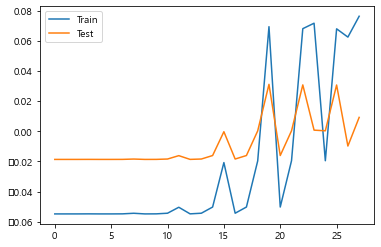

In [26]:
plt.plot(range(len(train_rate)),train_arr[:,2], label='Train')
plt.plot(range(len(test_rate)),test_arr[:,2], label='Test')
plt.legend()
plt.show()

In [27]:
#실험을 통해 얻은 최적의 C,gamma 파라미터로 만든 모형
svr=SVR(C=10,gamma=0.1)
svr.fit(X_train_scaled, y_train)
score_tr=svr.score(X_train_scaled, y_train)
score_te=svr.score(X_test_scaled, y_test)
result_tr.append(score_tr)
result_te.append(score_te)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)

학습용 정확도 : 0.06932839127238788
검증용 정확도 : 0.03111235760244202


In [28]:
predictions = svr.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 19.99831836417241


In [29]:
################ Gradient boosting ################
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(X_train_scaled, y_train)
score_tr=GB.score(X_train_scaled, y_train)
score_te=GB.score(X_test_scaled, y_test)
print('학습용 정확도 :', score_tr)
print('검증용 정확도 :', score_te)
result_tr.append(score_tr)
result_te.append(score_te)

학습용 정확도 : 0.45516043119103256
검증용 정확도 : -0.0035992849832793272


In [30]:
predictions = GB.predict(X_test_scaled)
mse=mean_squared_error(y_test, predictions)
rmse=np.sqrt(mse)
result_rm.append(rmse)
print('평균제곱오차 :', rmse)

평균제곱오차 : 20.3533987507641


In [31]:
print(result_tr)
print(result_te)
print(result_rm)

[0.09418571941097065, 0.1582823710332053, 0.8619482224211334, 0.17889605262425923, 0.09507943824114673, 0.06932839127238788, 0.45516043119103256]
[0.02384729516925388, -0.10031608222205324, -0.07044723313407553, 0.03053388866628648, 0.0242970287317964, 0.03111235760244202, -0.0035992849832793272]
[20.07315557147042, 21.311572695211012, 21.020323789615283, 20.004287415301334, 20.068530981609435, 19.99831836417241, 20.3533987507641]


최적의 알고리즘(학습용): RF
최고 정확도(학습용): 0.8619482224211334
최적의 알고리즘(검증용): SVR
최고 정확도(검증용): 0.03111235760244202


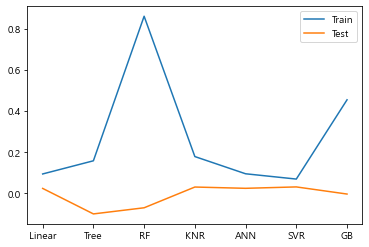

In [32]:
#분류 모형의 정확도 비교
methods=['Linear','Tree','RF','KNR','ANN','SVR', 'GB'] #분류 모형 이름
result_tr_arr=np.array(result_tr) #넘파이배열로 바꾸고
max_rate_tr=np.max(result_tr_arr)  #최대값을 구하고
idx_tr=np.argmax(result_tr_arr)  #최대값의 인덱스

result_te_arr=np.array(result_te)
max_rate_te=np.max(result_te_arr) 
idx_te=np.argmax(result_te_arr) 

print('최적의 알고리즘(학습용):',methods[idx_tr]) 
print('최고 정확도(학습용):', max_rate_tr)

print('최적의 알고리즘(검증용):',methods[idx_te]) 
print('최고 정확도(검증용):', max_rate_te)

plt.plot(methods, result_tr_arr, label='Train')
plt.plot(methods, result_te_arr, label='Test')
plt.legend()
plt.show() 

최적의 알고리즘(평균제곱오차))): SVR
최저 평균제곱오차: 19.99831836417241


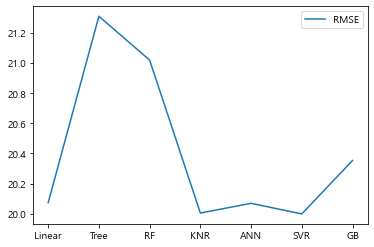

In [33]:
result_rm_arr=np.array(result_rm)
min_rate_rm=np.min(result_rm_arr) #최소값을 구하고
idx_rm=np.argmin(result_rm_arr)

print('최적의 알고리즘(평균제곱오차))):',methods[idx_rm]) 
print('최저 평균제곱오차:', min_rate_rm)

plt.plot(methods, result_rm_arr, label='RMSE')
plt.legend()
plt.show() 

In [34]:
X_train

,비아파트가구수,아파트평균시가,약국수,극장수,의료기관,교육기관,대중교통,월매출평균
상권코드,,,,,,,,
1001213,94.315789,9.296241e+07,4.0,1.000000,0.0,0.0,6.421053,1.357195e+07
1000830,1027.850000,1.161040e+08,0.0,0.000000,0.0,0.0,2.300000,2.170503e+08
1000351,896.210526,9.554635e+07,1.0,0.631579,0.0,0.0,0.000000,2.224935e+07
1000232,1429.600000,1.068851e+08,1.9,0.000000,0.0,1.0,7.900000,3.148232e+07
1001343,630.133333,1.467041e+08,2.0,0.000000,0.0,0.0,1.000000,1.458727e+08
...,...,...,...,...,...,...,...,...
1000516,426.250000,1.662365e+08,1.0,0.000000,0.4,1.0,6.900000,4.380357e+07
1000199,504.850000,1.500244e+08,0.0,0.000000,0.0,1.0,1.000000,4.140386e+07
1000270,1370.100000,9.492011e+07,2.0,0.000000,0.0,2.7,0.000000,5.870440e+07
